C:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


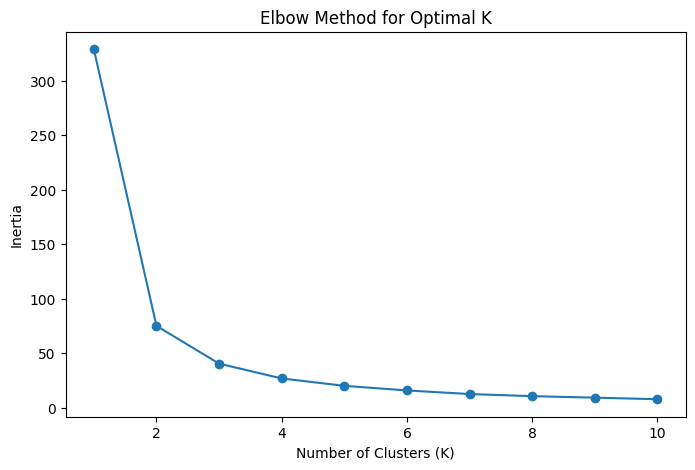

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# run k means for a range of k values
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(rfm_scalled)
    inertia.append(kmeans.inertia_)

# let's plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()